<h1>Chapter 2: Analysis</h1>

<span>
My first jupyter notebook, demonstrating some code from class and the second chapter.
    
We explore somewhat how to write efficient algorithms. How do we define efficient though? Typically order of magnitude, or O(n\*\*2) is least efficient. This is because we are squaring n with each iteration or function of O. On the scale of algorithm efficieny O(n\*\*2) is closer to being an exponential algorithm. Which is bad, becase if n is greater than a certain number modern computers would not be able to calculate for n, we want algorithms as close to linear as possible. In the case that we are working with large amounts of data or doing huge mathematical expressions the problem becomes exponentially harder to solve, which takes more time.</span>

In [22]:
# Importing some things
import matplotlib.patches as patches
from matplotlib import pyplot
from time import time
import math
from executiontime import execution_time
from issubstring import *
from random_string import *

<h2>Plotting O(): </h2>

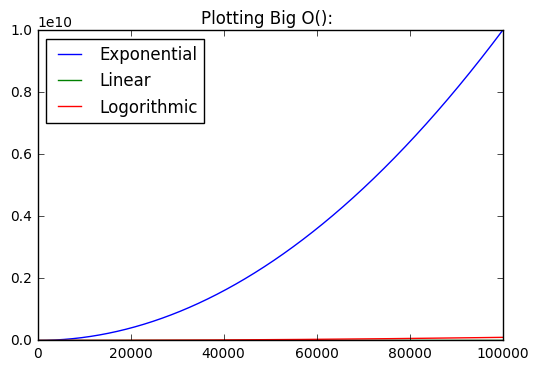

In [23]:
title = 'Plotting Big O(): '
label_y = ''
label_x = ''

#"Lower bound"
lb = 1
#"Upper bound"
ub = 100000

vals = range(lb, ub)


ub = ub * 100
# Exponential
exp = [x ** 2 for x in vals]

# Linear
fn = [10 * x + 0.1 * x * math.log(x) for x in vals]

# Logorithmic
gn = [0.01 * x ** 2 for x in vals]

expplot = pyplot.plot(exp, label='Exponential')
linplot = pyplot.plot(fn, label='Linear')
logplot = pyplot.plot(gn, label='Logorithmic')

pyplot.legend(loc='best')
pyplot.ylabel(label_y)
pyplot.xlabel(label_x)
pyplot.title(title)
pyplot.grid(False)


pyplot.show()

In this case the Linear function which is green on the plot above, is the fastest algorithm. Another way to think about the problem of writing efficient algorithms: an ideal algorithm would be written such that it both takes the least amount of steps and that the steps taken also take the least amount of steps themselves. Since python is a very high level language as n becomes larger so too do the amount of steps exponentially, making processing times grow exponentially as well. So an ideal algorithm scales in order of magnitude as linearly as possible.

<h2>Finding substrings: </h2>

This one was tricky, here's how <a href="http://pastebin.com/2SB6iAa6">Dylan</a> or <a href="https://gist.github.com/ameerkat/626643">this guy</a> wrote the algorithm.

But I didn't want to do something so simple with so many lines of code. I wrote my own. This is my attempt at the <a href="https://en.wikipedia.org/wiki/Boyer%E2%80%93Moore_string_search_algorithm">Boyer-Moore string search</a> algorithm:

In [5]:
string = 'bazbarthequickbrownfoxjumpsoverthelazydogoffthequickbrownfoxjumpsoverthelazydogthequickbrownoofjumpsoverthelazyfoo'
substring = 'foo'

print(isSubStr().is_substring(substring, string))
print(isSubStr().is_substring('bleh', 'blah'))

True
False


Say we have the string "ANPANMAN" and want to find the substring "PAN", this is the Boyer-Moore algorithm in a nutshell:


In [6]:
string = 'ANPANMAN'

print(string)
fstring = string[0:3]
print(fstring + '_____')
fstring = string[1:4]
print('.' + fstring + '____')
fstring = string[2:5]
print('..' + fstring + '___')
fstring = string[3:6]
print('...' + fstring + '__')
fstring = string[4:7]
print('....' + fstring + '_')
fstring = string[5:8]
print('.....' + fstring)
fstring = string[6:9]
print('......' + fstring)


ANPANMAN
ANP_____
.NPA____
..PAN___
...ANM__
....NMA_
.....MAN
......AN


Demonstrating how I want my algorithm to behave:

In [7]:
print(isSubStr().is_substring('foo', 'FOO'))
print(isSubStr().is_substring('foo', 'oof'))
print(isSubStr().is_substring('foo', 'foofoofoo'))

False
False
True


Of course this is just to demonstrate learning how to implement an algorithm from scratch (and testing for O()), but there's the default function:


In [8]:
print(isSubStr().default_is_substring('foo', 'FOO'))
print(isSubStr().default_is_substring('foo', 'oof'))
print(isSubStr().default_is_substring('foo', 'foofoofoo'))

False
False
True


<a href='https://github.com/RomanSC/algorithms/blob/master/chapter-2/issubstring.py'>Source on Github</a>
<pre>
<!-- HTML generated using hilite.me --><div style="background: #ffffff; overflow:auto;width:auto;border:solid gray;border-width:.1em .1em .1em .8em;padding:.2em .6em;"><pre style="margin: 0; line-height: 125%"><span style="color: #DD4422">&quot;&quot;&quot; issubstring.py | Tue, Jan 31, 2017 | Roman S. Collins</span>

<span style="color: #DD4422">    Implementation of Boyer-Moore string search algorithm in Python.</span>

<span style="color: #DD4422">    Source:</span>
<span style="color: #DD4422">    https://en.wikipedia.org/wiki/Boyer%E2%80%93Moore_string_search_algorithm</span>
<span style="color: #DD4422">    https://duckduckgo.com/?q=python+substring+function&amp;t=ffab&amp;ia=q://duckduckgo.com/?q=python+substring+function&amp;t=ffab&amp;ia=qa</span>

<span style="color: #DD4422">&quot;&quot;&quot;</span>

<span style="color: #008800; font-weight: bold">class</span> <span style="color: #BB0066; font-weight: bold">isSubStr</span>:
    string <span style="color: #333333">=</span> <span style="background-color: #fff0f0">&#39;checkoffcheckoofcheckfool&#39;</span>
    substring <span style="color: #333333">=</span> <span style="background-color: #fff0f0">&#39;foo&#39;</span>

    <span style="color: #008800; font-weight: bold">def</span> <span style="color: #0066BB; font-weight: bold">is_substring</span>(<span style="color: #007020">self</span>, substring, string):
        lcolon <span style="color: #333333">=</span> <span style="color: #0000DD; font-weight: bold">0</span>; rcolon <span style="color: #333333">=</span> <span style="color: #007020">len</span>(substring); found <span style="color: #333333">=</span> <span style="color: #007020">False</span>

        <span style="color: #008800; font-weight: bold">for</span> a_iteration <span style="color: #000000; font-weight: bold">in</span> <span style="color: #007020">range</span>(<span style="color: #007020">len</span>(string) <span style="color: #333333">+</span> <span style="color: #0000DD; font-weight: bold">1</span>):
            astring <span style="color: #333333">=</span> string[lcolon:rcolon]
            lcolon <span style="color: #333333">+=</span> <span style="color: #0000DD; font-weight: bold">1</span>; rcolon <span style="color: #333333">+=</span> <span style="color: #0000DD; font-weight: bold">1</span>; check_char <span style="color: #333333">=</span> <span style="color: #0000DD; font-weight: bold">0</span>

            <span style="color: #008800; font-weight: bold">for</span> b_iteration <span style="color: #000000; font-weight: bold">in</span> <span style="color: #007020">range</span>(<span style="color: #007020">len</span>(astring)):
                <span style="color: #008800; font-weight: bold">if</span> astring[b_iteration] <span style="color: #333333">==</span> substring[b_iteration]:
                    check_char <span style="color: #333333">+=</span> <span style="color: #0000DD; font-weight: bold">1</span>

                    <span style="color: #008800; font-weight: bold">if</span> check_char <span style="color: #333333">==</span> <span style="color: #007020">len</span>(substring):
                        found <span style="color: #333333">=</span> <span style="color: #007020">True</span>

            <span style="color: #008800; font-weight: bold">if</span> found <span style="color: #333333">==</span> <span style="color: #007020">True</span>:
                <span style="color: #008800; font-weight: bold">return</span> found

            <span style="color: #888888">#if astring == substring:</span>
            <span style="color: #888888"># Still comparing whole strings</span>
            <span style="color: #888888">#    found = True</span>
            <span style="color: #888888">#    return found</span>
            <span style="color: #888888">#    pass</span>

            <span style="color: #008800; font-weight: bold">if</span> rcolon <span style="color: #333333">&gt;=</span> (<span style="color: #007020">len</span>(string) <span style="color: #333333">+</span> <span style="color: #0000DD; font-weight: bold">1</span>):
                found <span style="color: #333333">=</span> <span style="color: #007020">False</span>
                <span style="color: #008800; font-weight: bold">return</span> found

    <span style="color: #008800; font-weight: bold">def</span> <span style="color: #0066BB; font-weight: bold">default_is_substring</span>(<span style="color: #007020">self</span>, a, b):
        <span style="color: #008800; font-weight: bold">return</span> a <span style="color: #000000; font-weight: bold">in</span> b

<span style="color: #008800; font-weight: bold">def</span> <span style="color: #0066BB; font-weight: bold">main</span>():
    <span style="color: #DD4422">&quot;&quot;&quot; Doctest:</span>
<span style="color: #DD4422">    &gt;&gt;&gt; string = &#39;ANPANMAN&#39;</span>
<span style="color: #DD4422">    &gt;&gt;&gt; substring = &#39;PAN&#39;</span>
<span style="color: #DD4422">    &gt;&gt;&gt; print(isSubStr().is_substring(substring, string))</span>
<span style="color: #DD4422">    True</span>
<span style="color: #DD4422">    &gt;&gt;&gt; print(isSubStr().default_is_substring(substring, string))</span>
<span style="color: #DD4422">    True</span>
<span style="color: #DD4422">    &quot;&quot;&quot;</span>
    string <span style="color: #333333">=</span> <span style="background-color: #fff0f0">&#39;ANPANMAN&#39;</span>
    substring <span style="color: #333333">=</span> <span style="background-color: #fff0f0">&#39;PAN&#39;</span>

    <span style="color: #008800; font-weight: bold">while</span> isSubStr()<span style="color: #333333">.</span>is_substring(substring, string):
        <span style="color: #008800; font-weight: bold">break</span>
        <span style="color: #008800; font-weight: bold">print</span>(isSubStr()<span style="color: #333333">.</span>is_substring(substring, string))

<span style="color: #008800; font-weight: bold">if</span> __name__<span style="color: #333333">==</span><span style="background-color: #fff0f0">&#39;__main__&#39;</span>:
    main()
</pre></div>
</pre>

<h2>Generating Random Strings: </h2>

This was shown in the book as the monkey theorem problem. (And if I recall correctly in Jim showed an algorithm in class...)

This is mine. The function takes n equal to the length of the string you would like. Possible characters are simply every letter in the English alphabet plus space:

In [9]:
print(randStr().rand_string(10))

leyudfawqv


<a href='https://github.com/RomanSC/algorithms/blob/master/chapter-2/random_string.py'>Source on Github</a>

<pre>
<!-- HTML generated using hilite.me --><div style="background: #ffffff; overflow:auto;width:auto;border:solid gray;border-width:.1em .1em .1em .8em;padding:.2em .6em;"><pre style="margin: 0; line-height: 125%"><span style="color: #DD4422">&quot;&quot;&quot; random_string.py | Wed, Feb 01, 2017 | Roman S. Collins</span>

<span style="color: #DD4422">    Demonstrating returning random strings in Python.</span>

<span style="color: #DD4422">&quot;&quot;&quot;</span>
<span style="color: #008800; font-weight: bold">import</span> <span style="color: #0e84b5; font-weight: bold">random</span>

<span style="color: #008800; font-weight: bold">class</span> <span style="color: #BB0066; font-weight: bold">randStr</span>:
    <span style="color: #008800; font-weight: bold">def</span> <span style="color: #0066BB; font-weight: bold">rand_string</span>(<span style="color: #007020">self</span>, n):
        abc <span style="color: #333333">=</span> [<span style="background-color: #fff0f0">&#39;a&#39;</span>, <span style="background-color: #fff0f0">&#39;b&#39;</span>, <span style="background-color: #fff0f0">&#39;c&#39;</span>, <span style="background-color: #fff0f0">&#39;d&#39;</span>, <span style="background-color: #fff0f0">&#39;e&#39;</span>, <span style="background-color: #fff0f0">&#39;f&#39;</span>, <span style="background-color: #fff0f0">&#39;g&#39;</span>, <span style="background-color: #fff0f0">&#39;h&#39;</span>, <span style="background-color: #fff0f0">&#39;i&#39;</span>, <span style="background-color: #fff0f0">&#39;j&#39;</span>, <span style="background-color: #fff0f0">&#39;k&#39;</span>, <span style="background-color: #fff0f0">&#39;l&#39;</span>, <span style="background-color: #fff0f0">&#39;m&#39;</span>,
                    <span style="background-color: #fff0f0">&#39;n&#39;</span>, <span style="background-color: #fff0f0">&#39;o&#39;</span>, <span style="background-color: #fff0f0">&#39;p&#39;</span>, <span style="background-color: #fff0f0">&#39;q&#39;</span>, <span style="background-color: #fff0f0">&#39;r&#39;</span>, <span style="background-color: #fff0f0">&#39;s&#39;</span>, <span style="background-color: #fff0f0">&#39;t&#39;</span>, <span style="background-color: #fff0f0">&#39;u&#39;</span>, <span style="background-color: #fff0f0">&#39;v&#39;</span>,
                    <span style="background-color: #fff0f0">&#39;w&#39;</span>, <span style="background-color: #fff0f0">&#39;x&#39;</span>, <span style="background-color: #fff0f0">&#39;y&#39;</span>, <span style="background-color: #fff0f0">&#39;z&#39;</span>, <span style="background-color: #fff0f0">&#39; &#39;</span>]
        abc_copy <span style="color: #333333">=</span> <span style="color: #007020">list</span>(abc[x] <span style="color: #008800; font-weight: bold">for</span> x <span style="color: #000000; font-weight: bold">in</span> <span style="color: #007020">range</span>(<span style="color: #007020">len</span>(abc)))
        <span style="color: #008800; font-weight: bold">return</span> <span style="background-color: #fff0f0">&#39;&#39;</span><span style="color: #333333">.</span>join(random<span style="color: #333333">.</span>sample(abc_copy, n))

<span style="color: #008800; font-weight: bold">def</span> <span style="color: #0066BB; font-weight: bold">main</span>():
    <span style="color: #DD4422">&quot;&quot;&quot; Again only sanity checks, because output of the</span>
<span style="color: #DD4422">        function changes.</span>

<span style="color: #DD4422">        Doctest:</span>
<span style="color: #DD4422">        &gt;&gt;&gt; len(randStr().rand_string(10))</span>
<span style="color: #DD4422">        10</span>
<span style="color: #DD4422">        &gt;&gt;&gt; isinstance(randStr().rand_string(10), str)</span>
<span style="color: #DD4422">        True</span>
<span style="color: #DD4422">    &quot;&quot;&quot;</span>
    <span style="color: #888888"># Fill main with something other than pass</span>
    <span style="color: #008800; font-weight: bold">print</span>(randStr()<span style="color: #333333">.</span>rand_string(<span style="color: #0000DD; font-weight: bold">10</span>))


<span style="color: #008800; font-weight: bold">if</span> __name__<span style="color: #333333">==</span><span style="background-color: #fff0f0">&#39;__main__&#39;</span>:
    main()
</pre></div>

</pre>

<h2>Plotting is_substring(): </h2>

Let's find out how my algorithm scales compared to Python's builtin version

2.1028518676757813e-08


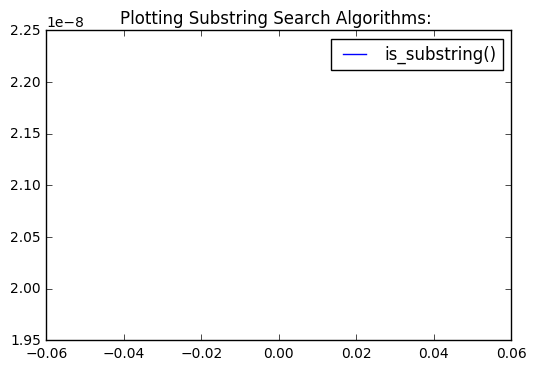

In [1]:
""" issubstring.py | Tue, Jan 31, 2017 | Roman S. Collins

    Implementation of Boyer-Moore string search algorithm in Python.

    Source:
    https://en.wikipedia.org/wiki/Boyer%E2%80%93Moore_string_search_algorithm
    https://duckduckgo.com/?q=python+substring+function&t=ffab&ia=q://duckduckgo.com/?q=python+substring+function&t=ffab&ia=qa

"""
import math, time
from executiontime import execution_time
from matplotlib import pyplot

class isSubStr:
    def is_substring(self, substring, longstring):
        lcolon = 0; rcolon = len(substring); found = False

        for a_iteration in range(len(longstring) + 1):
            astring = longstring[lcolon:rcolon]
            lcolon += 1; rcolon += 1; check_char = 0

            for b_iteration in range(len(astring)):
                if astring[b_iteration] == substring[b_iteration]:
                    check_char += 1

                    if check_char == len(substring):
                        found = True

            if found == True:
                return found

            #if astring == substring:
            # Still comparing whole strings
            #    found = True
            #    return found
            #    pass

            if rcolon >= (len(longstring) + 1):
                found = False
                return found

    def default_is_substring(self, a, b):
        return a in b

def main():
    """ Doctest:
    >>> string = 'ANPANMAN'
    >>> substring = 'PAN'
    >>> print(isSubStr().is_substring(substring, longstring))
    True
    >>> print(isSubStr().default_is_substring(substring, longstring))
    True
    """
    longstring = 'ANPANMAN'
    substring = 'PAN'

    longstring = 'checkoffcheckoofcheckfool'
    substring = 'foo'


    #c = execution_time(isSubStr().is_substring('cat', 'aaaaahcat'), 10000)
    #pyplot.plot(c, label='is_substring()')
    #pyplot.plot(isSubStr().is_substring('cat', 'aaaaahcat'), label='is_substring()')
    c = execution_time(isSubStr().is_substring('cat', 'aaaaahcat'), 10000)
    print(c[1])
    pyplot.plot(c[1], label='is_substring()')

    title = 'Plotting Substring Search Algorithms: '
    label_y = ''
    label_x = ''

    pyplot.legend(loc='best')
    pyplot.ylabel(label_y)
    pyplot.xlabel(label_x)
    pyplot.title(title)
    pyplot.grid(False)

    pyplot.show()

if __name__=='__main__':
    main()